<a href="https://colab.research.google.com/github/ektaarora3501/Neural-Networks/blob/master/Cat/dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import cv2
import os,io,random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense,Activation,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
#!pip install livelossplot
from livelossplot import PlotLossesKeras
from keras.models import Sequential
from keras.optimizers import RMSprop

In [0]:
from google.colab import drive
drive.mount('data',force_remount=True)

Mounted at data


In [0]:
!ls "data/My Drive/data/train"

cats  dogs


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json  ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets list -s dogs

In [0]:
!kaggle datasets download -d  biaiscience/dogs-vs-cats

 99% 809M/817M [00:19<00:00, 50.6MB/s]
100% 817M/817M [00:19<00:00, 43.1MB/s]


In [0]:
#!unzip dogs-vs-cats.zip
!cd sample_data
!ls

dogs-vs-cats.zip  kaggle.json  sample_data  test  train


dog.961.jpg
Shape of the image is: (316, 450, 3)
Max: 221 , Min: 0


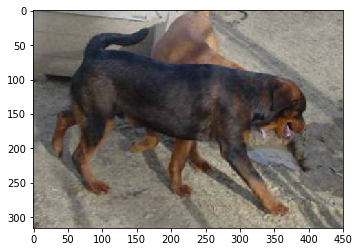

In [0]:
example_img = random.choice(os.listdir("data/My Drive/data/train/cats"))
print(example_img)
#print("Label:", labels_df.loc[labels_df['id'] == example_img[:-4]]['breed'].all())
example_img = plt.imread("data/My Drive/data/train/cats/"+example_img)
plt.grid(False)
plt.imshow(example_img)
print("Shape of the image is:", example_img.shape)
print("Max:", example_img.max(), ", Min:", example_img.min())

In [0]:
image_size=200
image_width,image_height=image_size,image_size
epochs=20
train_size=1600
batch_size=36
test_size=30

input_shape=(image_width,image_height,3)

#using keras sequential model
train_path="data/My Drive/data/train"
test_path="data/My Drive/data/test"




In [0]:
model =Sequential()
model.add(Conv2D(32, (3, 3),border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32,(3,3),border_mode='same',activation='relu'))  #inner layers with fewer filters 
model.add(MaxPooling2D(pool_size=(2,2)))

#outer layers to resolve more complex features have more filters
model.add(Conv2D(64, (3, 3),border_mode='same', activation='relu'))
model.add(Conv2D(64,(3,3),border_mode='same',activation='relu'))  #inner layers with fewer filters 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3),border_mode='same', activation='relu'))
model.add(Conv2D(128,(3,3),border_mode='same',activation='relu'))  #inner layers with fewer filters 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3, 3),border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(256,(3,3),border_mode='same',activation='relu'))  #inner layers with fewer filters 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid')) #final layer.. will be activated by sigmoid
    
  
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),  #setting the learning rate
              metrics=['accuracy'])  #as there are two classes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation=

In [0]:
train_data_gen=ImageDataGenerator(
         rescale=1./255,
         shear_range=0.1,
         zoom_range=0.1,
         horizontal_flip=True,
         
)

test_data_gen=ImageDataGenerator(
       rescale=1./255,     
)


training_generator = train_data_gen.flow_from_directory(
    train_path,
    target_size=(image_width, image_height),
    batch_size=train_size,
    class_mode="binary")

#print(training_generator.class_indices)

test_generator = test_data_gen.flow_from_directory(
    test_path,
    target_size=(image_width, image_height),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames),
    epochs=epochs,
    callbacks=[PlotLossesKeras()])

Found 2400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


ResourceExhaustedError: ignored

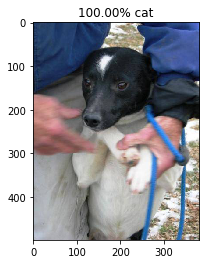

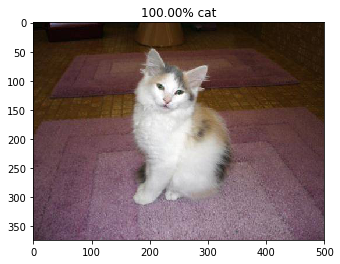

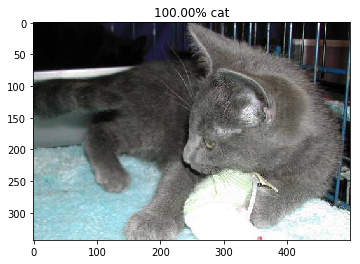

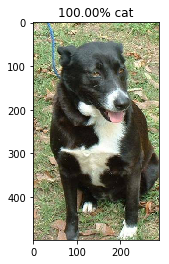

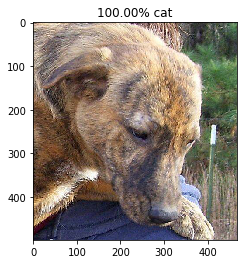

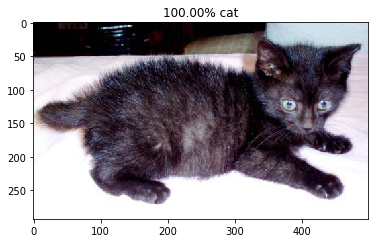

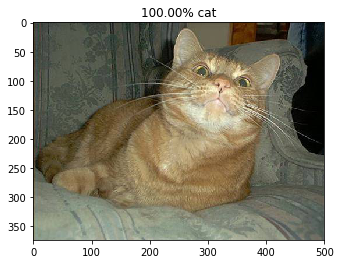

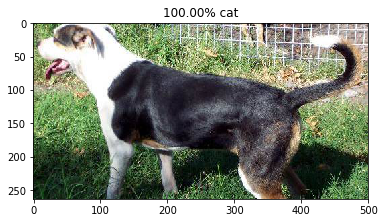

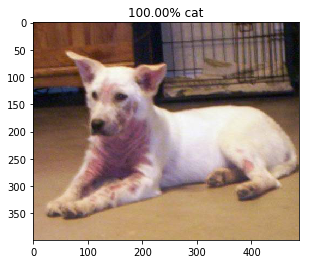

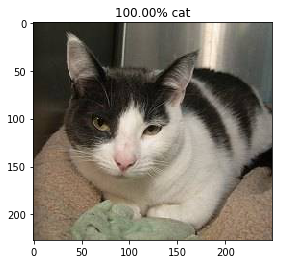

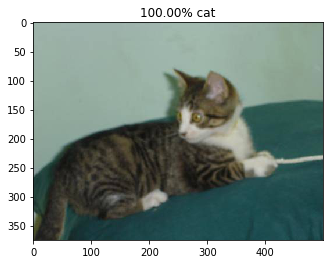

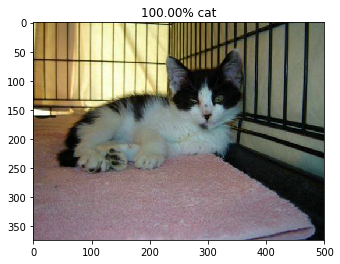

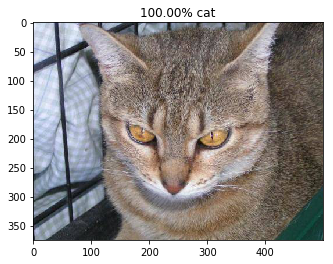

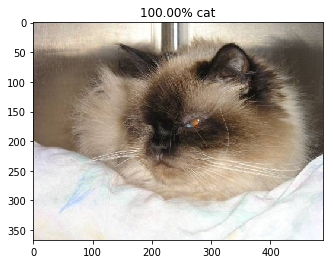

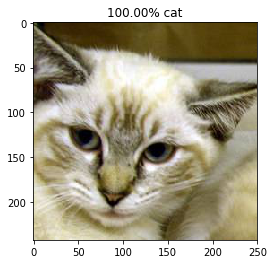

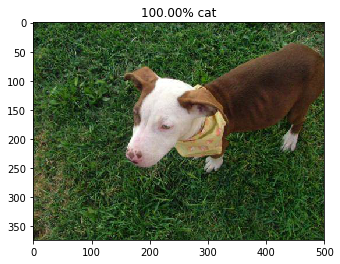

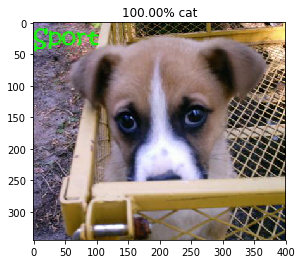

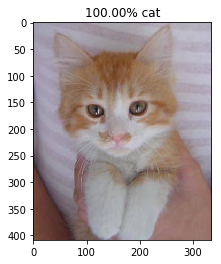

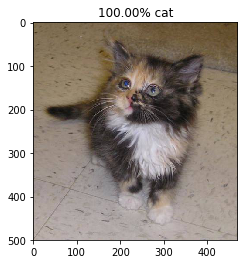

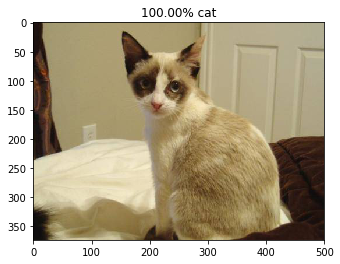

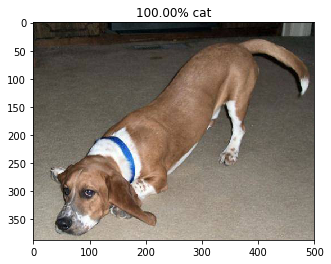

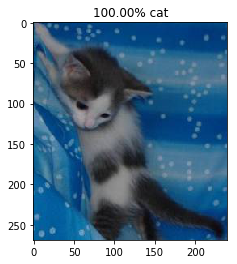

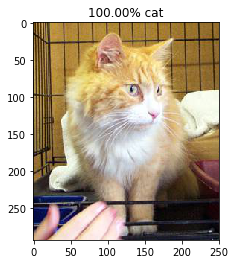

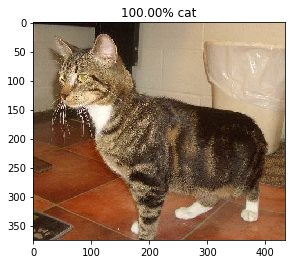

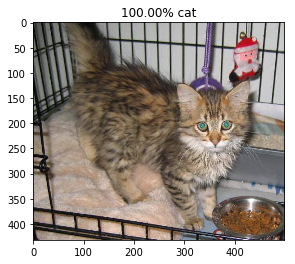

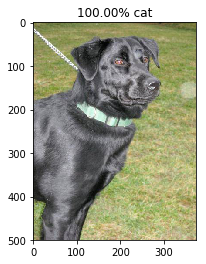

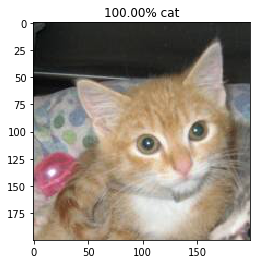

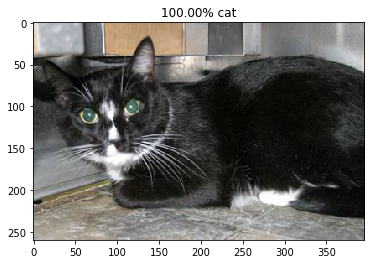

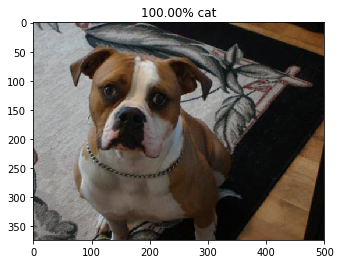

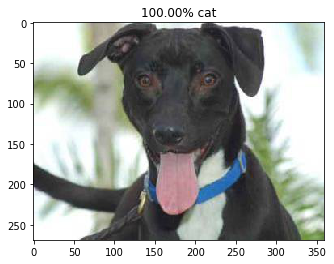

In [0]:
probabilities = model.predict_generator(test_generator, test_size)
for index, probability in enumerate(probabilities):
    image_path = test_path + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()
